In [ ]:
# ! pip install mlxtend

### K Nearest Neighbors algo

In [2]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
iris = datasets.load_iris()
X = iris.data[:,:2]            # cosideringg only 2 columns 
Y = iris.target

In [4]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=43)

In [14]:
k_val = list(range(1,50,2))
all_scores = []

for k in k_val:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train,Y_train)
    Y_pred = model.predict(X_test)
    score = accuracy_score(Y_test,Y_pred)
    all_scores.append(score)
    

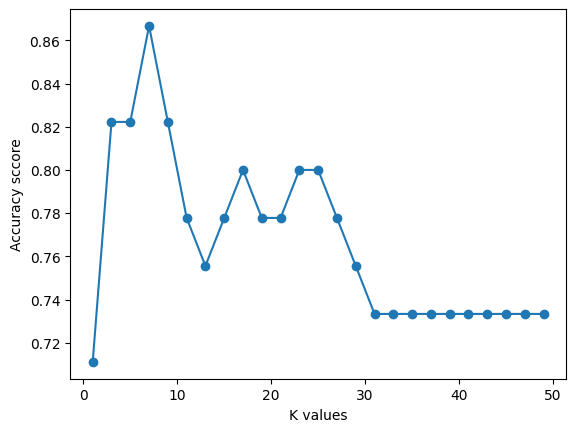

In [15]:
plt.plot(k_val,all_scores,marker = "o",linestyle = "-")
plt.xlabel("K values")
plt.ylabel("Accuracy sccore")
plt.show()

In [19]:
best_k = k_val[all_scores.index(max(all_scores))]

In [20]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train,Y_train)
Y_pred = best_knn.predict(X_test)

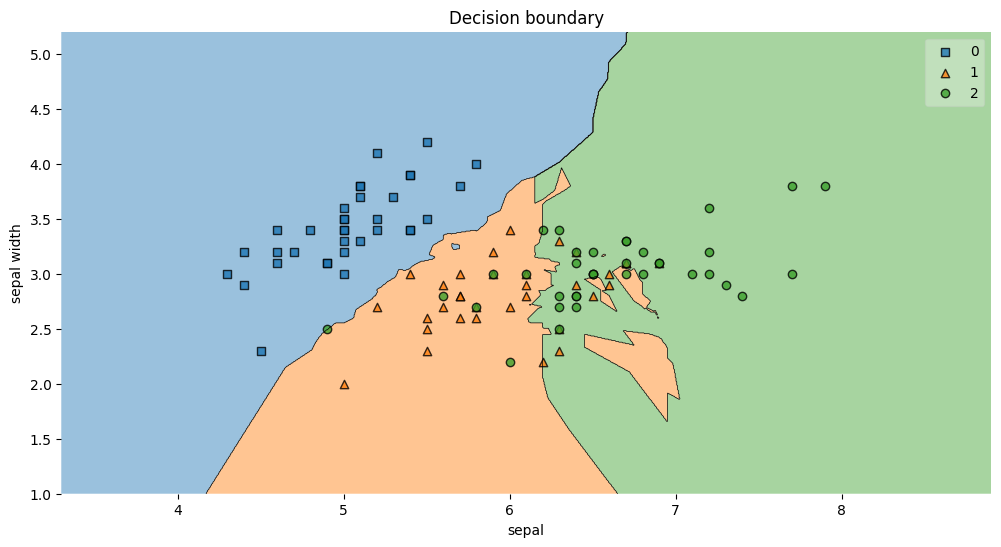

In [22]:
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(12,6)) 
plot_decision_regions(X_train,Y_train,clf = best_knn)
plt.xlabel('sepal')
plt.ylabel('sepal width')
plt.title('Decision boundary')
plt.show()